# Titanic Data Analysis

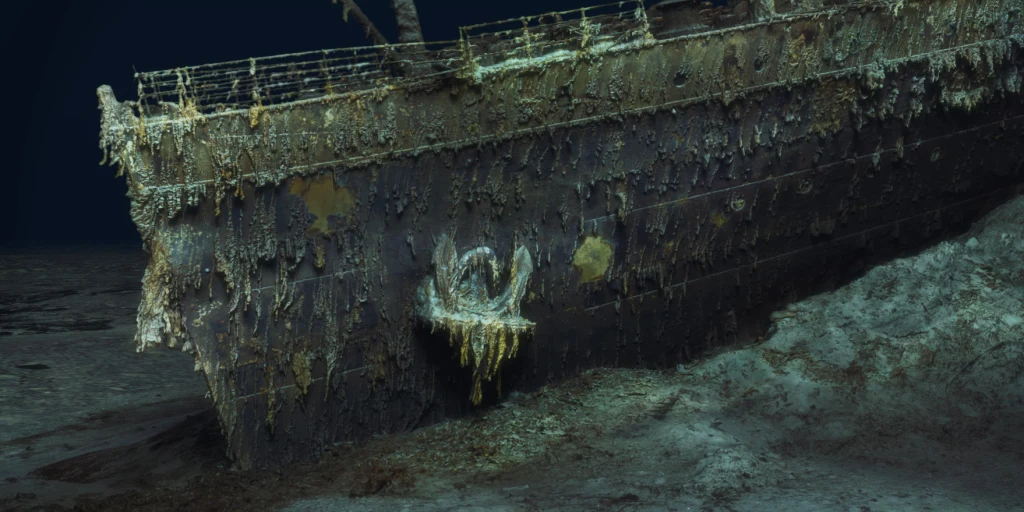

# Dataset Description
### The Titanic dataset provides information on the passengers aboard the Titanic.
## Key features include:
 - survived: Survival status (0 = No, 1 = Yes)
 - pclass: Ticket class (1 = First, 2 = Second, 3 = Third)
 - sex: Gender of the passenger
 - age: Age of the passenger
 - sibsp: Number of siblings/spouses aboard
 - parch: Number of parents/children aboard
 - fare: Fare paid by the passenger
 - embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
 - Additional features include "who" (man, woman, child), "class", "adult_male", "deck", "embark_town", "alive", and "alone".

The dataset contains missing values in some columns, such as 'age' and 'deck', which need to be handled during preprocessing.


# 1. Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset provided by the user
file_path = '/content/titanic.csv'
titanic_data = pd.read_csv(file_path)

In [4]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 2. Exploratory Data Analysis

In [45]:
# Shape of the dataset
data_shape = titanic_data.shape
print("Shape:", data_shape)

Shape: (891, 18)


In [11]:
# Summary statistics for numerical columns
data_summary = titanic_data.describe()
print("\nSummary Statistics:\n", data_summary)


Summary Statistics:
          survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [12]:
# Checking for missing values
missing_values = titanic_data.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [13]:
# Data types of the columns
data_types = titanic_data.dtypes
print("\nData Types:\n", data_types)


Data Types:
 survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object


#3. Data Preprocessing

In [15]:
# Handling missing values
titanic_data['age'] = titanic_data['age'].fillna(titanic_data['age'].median())
titanic_data['embarked'] = titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0])
titanic_data['embark_town'] = titanic_data['embark_town'].fillna(titanic_data['embark_town'].mode()[0])

In [16]:
# Droping the 'deck' column due to excessive missing values
titanic_data = titanic_data.drop(columns=['deck'])

In [17]:
# Encoding categorical variables: 'sex', 'embarked', 'class', 'who', 'embark_town', 'alive', 'alone'
categorical_columns = ['sex', 'embarked', 'class', 'who', 'embark_town', 'alive', 'alone']
titanic_data = pd.get_dummies(titanic_data, columns=categorical_columns, drop_first=True)

In [18]:
# Verify the dataset after cleaning
print("\nDataset Information After Cleaning:\n")
titanic_data.info()


Dataset Information After Cleaning:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   age                      891 non-null    float64
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   fare                     891 non-null    float64
 6   adult_male               891 non-null    bool   
 7   sex_male                 891 non-null    bool   
 8   embarked_Q               891 non-null    bool   
 9   embarked_S               891 non-null    bool   
 10  class_Second             891 non-null    bool   
 11  class_Third              891 non-null    bool   
 12  who_man                  891 non-null    bool   
 13  who_woman                891 non-null    b

In [19]:
# Display first few rows to confirm changes
print("\nFirst Few Rows of the Processed Dataset:\n", titanic_data.head())


First Few Rows of the Processed Dataset:
    survived  pclass   age  sibsp  parch     fare  adult_male  sex_male  \
0         0       3  22.0      1      0   7.2500        True      True   
1         1       1  38.0      1      0  71.2833       False     False   
2         1       3  26.0      0      0   7.9250       False     False   
3         1       1  35.0      1      0  53.1000       False     False   
4         0       3  35.0      0      0   8.0500        True      True   

   embarked_Q  embarked_S  class_Second  class_Third  who_man  who_woman  \
0       False        True         False         True     True      False   
1       False       False         False        False    False       True   
2       False        True         False         True    False       True   
3       False        True         False        False    False       True   
4       False        True         False         True     True      False   

   embark_town_Queenstown  embark_town_Southampton  ali

# 4. Data Visualization

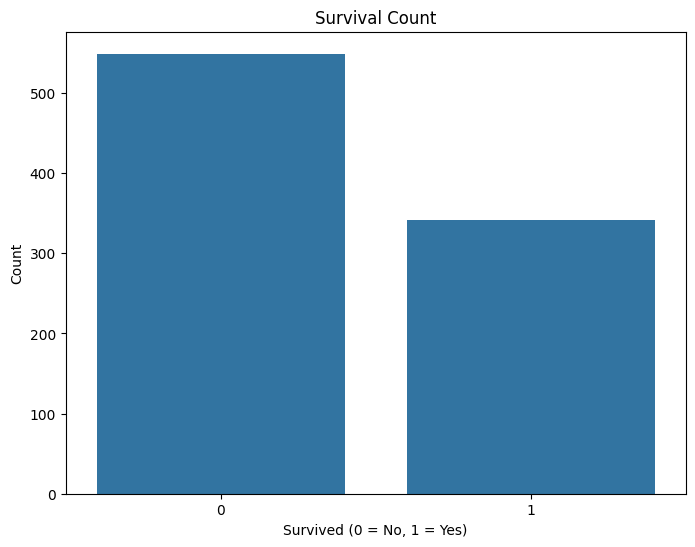

In [20]:
#Survival count
plt.figure(figsize=(8, 6))
sns.countplot(x='survived', data=titanic_data)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

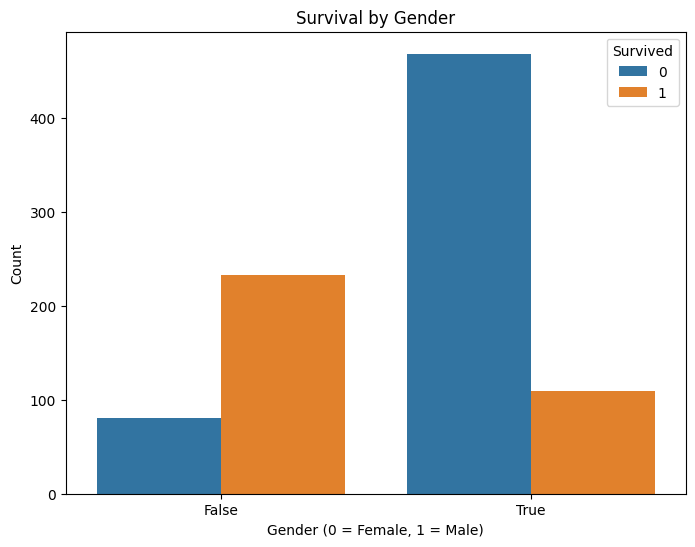

In [21]:
# Survival by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='sex_male', hue='survived', data=titanic_data)
plt.title('Survival by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

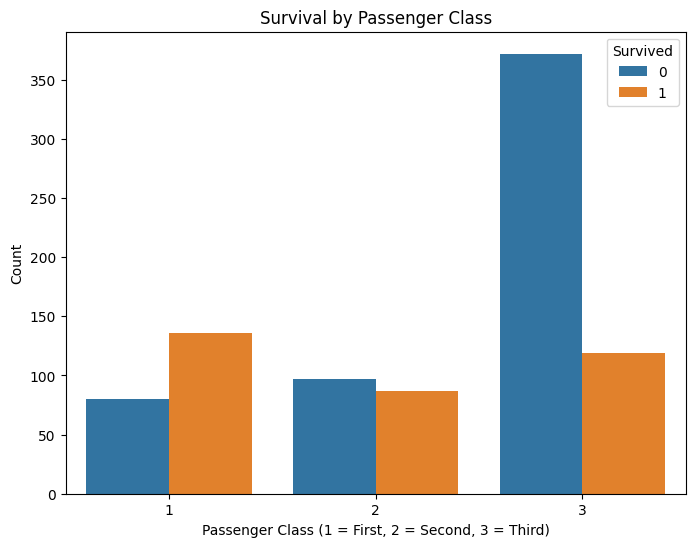

In [22]:
# Survival by passenger class
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', hue='survived', data=titanic_data)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class (1 = First, 2 = Second, 3 = Third)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

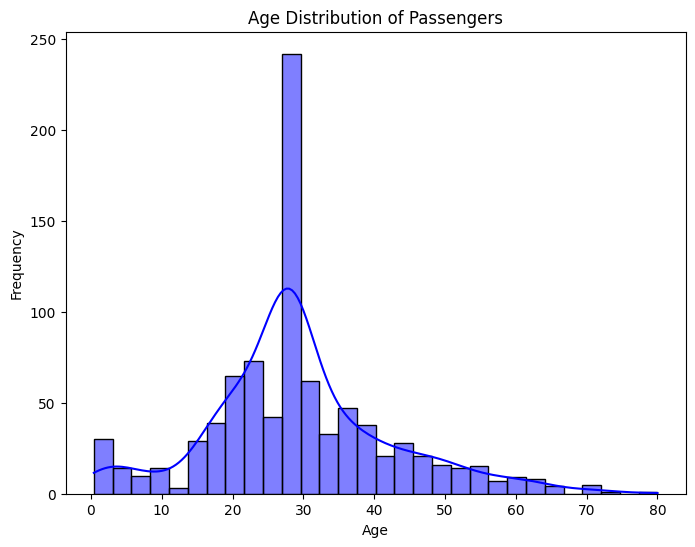

In [23]:
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(titanic_data['age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 5. Analytical Questions

In [25]:
# 1. What is the survival rate?
survival_rate = titanic_data['survived'].mean()
print(f"Survival Rate: {survival_rate * 100:.2f}%")

Survival Rate: 38.38%


In [27]:
#2. What is the average age of passengers?
average_age = titanic_data['age'].mean()
print(f"Average Age: {average_age:.2f} years")

Average Age: 29.36 years


In [28]:
# 3. What is the distribution of passenger classes?
class_distribution = titanic_data['pclass'].value_counts()
print("\nPassenger Class Distribution:\n", class_distribution)


Passenger Class Distribution:
 pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [29]:
# 4. What is the gender distribution?
gender_distribution = titanic_data['sex_male'].value_counts()
print("\nGender Distribution:\n", gender_distribution)


Gender Distribution:
 sex_male
True     577
False    314
Name: count, dtype: int64


In [30]:
# 5. What is the average fare paid by survivors vs. non-survivors?
average_fare_survivors = titanic_data[titanic_data['survived'] == 1]['fare'].mean()
average_fare_non_survivors = titanic_data[titanic_data['survived'] == 0]['fare'].mean()
print(f"\nAverage Fare (Survivors): {average_fare_survivors:.2f}")
print(f"Average Fare (Non-Survivors): {average_fare_non_survivors:.2f}")


Average Fare (Survivors): 48.40
Average Fare (Non-Survivors): 22.12


In [31]:
# 6. What is the age distribution of survivors vs. non-survivors?
age_distribution_survived = titanic_data[titanic_data['survived'] == 1]['age'].mean()
age_distribution_non_survived = titanic_data[titanic_data['survived'] == 0]['age'].mean()
print(f"\nAverage Age (Survivors): {age_distribution_survived:.2f}")
print(f"Average Age (Non-Survivors): {age_distribution_non_survived:.2f}")


Average Age (Survivors): 28.29
Average Age (Non-Survivors): 30.03


In [32]:
# 7. How many passengers traveled alone?
travel_alone_count = titanic_data['alone_True'].sum()
print(f"\nNumber of Passengers Who Traveled Alone: {travel_alone_count}")


Number of Passengers Who Traveled Alone: 537


In [33]:
# 8. What is the survival rate for passengers who traveled alone?
alone_survival_rate = titanic_data[titanic_data['alone_True'] == 1]['survived'].mean()
print(f"\nSurvival Rate (Traveled Alone): {alone_survival_rate * 100:.2f}%")


Survival Rate (Traveled Alone): 30.35%


In [37]:
# 9. What is the survival rate by passenger class?
survival_rate_by_class = titanic_data.groupby('pclass')['survived'].mean()*100
print("\nSurvival Rate by Passenger Class:\n", survival_rate_by_class)


Survival Rate by Passenger Class:
 pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64


In [39]:
# 10. What is the survival rate by gender?
survival_rate_by_gender = titanic_data.groupby('sex_male')['survived'].mean()*100
print("\nSurvival Rate by Gender:\n", survival_rate_by_gender)


Survival Rate by Gender:
 sex_male
False    74.203822
True     18.890815
Name: survived, dtype: float64


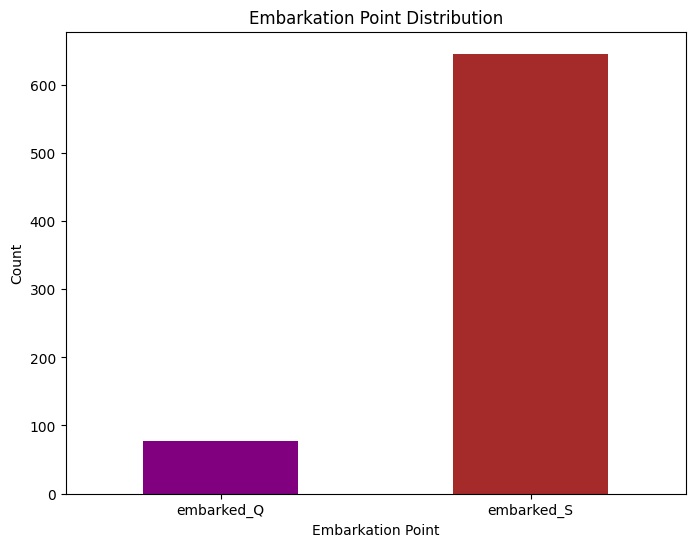

In [40]:
# 11. What is the most common embarkation point?
most_common_embarkation = titanic_data[['embarked_Q', 'embarked_S']].sum().idxmax()
embark_counts = titanic_data[['embarked_Q', 'embarked_S']].sum()
plt.figure(figsize=(8, 6))
embark_counts.plot(kind='bar', color=['purple', 'brown'])
plt.title('Embarkation Point Distribution')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

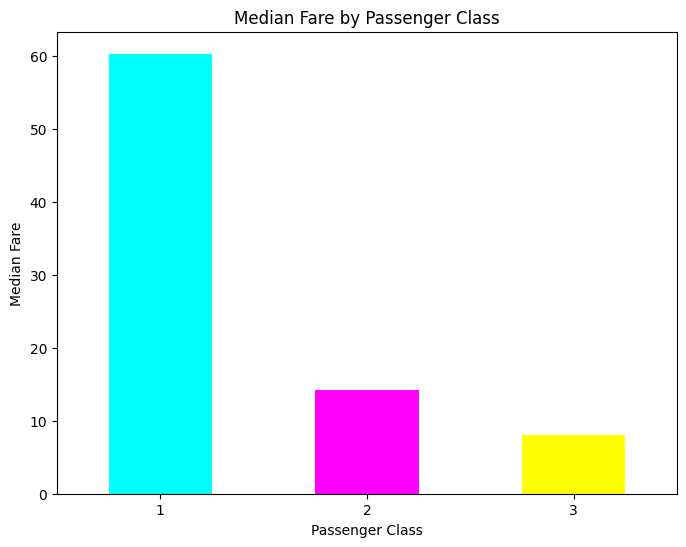

In [41]:
# 12. What is the median fare paid by passengers in each class?
median_fare_by_class = titanic_data.groupby('pclass')['fare'].median()
plt.figure(figsize=(8, 6))
median_fare_by_class.plot(kind='bar', color=['cyan', 'magenta', 'yellow'])
plt.title('Median Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Median Fare')
plt.xticks(rotation=0)
plt.show()

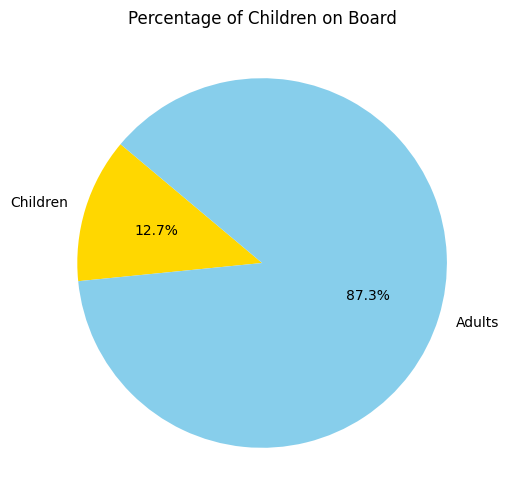

In [42]:
# 13. What is the percentage of children (age < 18) on board?
children_percentage = (titanic_data[titanic_data['age'] < 18].shape[0] / titanic_data.shape[0]) * 100
plt.figure(figsize=(6, 6))
labels = ['Children', 'Adults']
sizes = [titanic_data[titanic_data['age'] < 18].shape[0], titanic_data[titanic_data['age'] >= 18].shape[0]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['gold', 'skyblue'])
plt.title('Percentage of Children on Board')
plt.show()


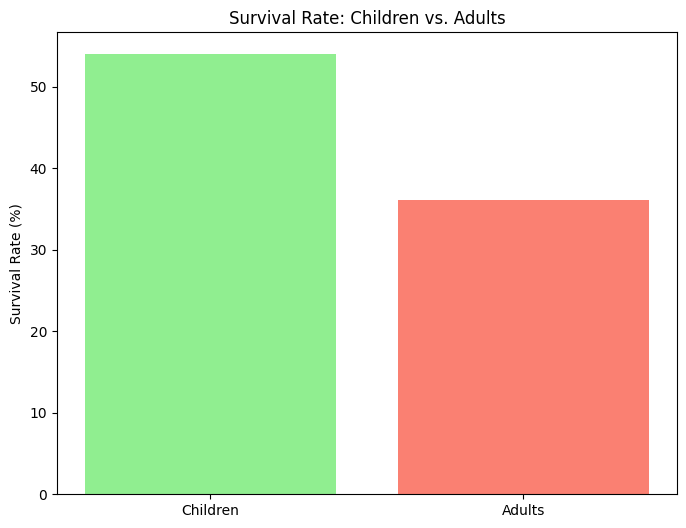

In [43]:
# 14. What is the survival rate of children (age < 18)?
children_survival_rate = titanic_data[titanic_data['age'] < 18]['survived'].mean() * 100
children_survival = titanic_data[titanic_data['age'] < 18]['survived'].mean() * 100
adults_survival = titanic_data[titanic_data['age'] >= 18]['survived'].mean() * 100
plt.figure(figsize=(8, 6))
plt.bar(['Children', 'Adults'], [children_survival, adults_survival], color=['lightgreen', 'salmon'])
plt.title('Survival Rate: Children vs. Adults')
plt.ylabel('Survival Rate (%)')
plt.show()

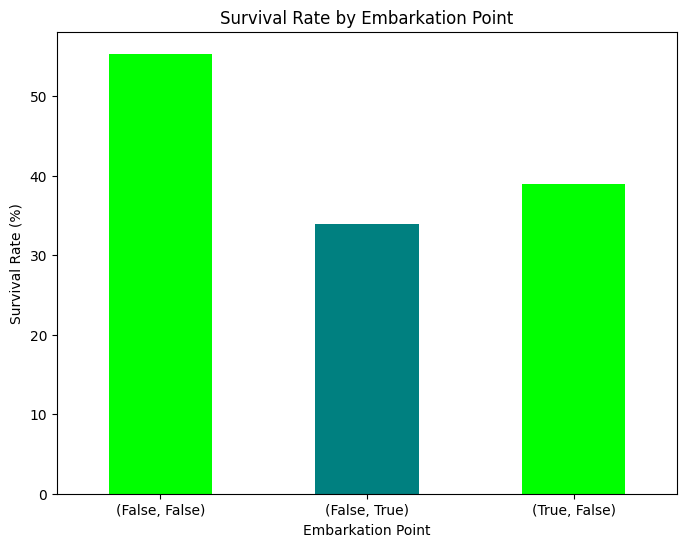

In [44]:
# 15. What is the survival rate by embarkation point?
survival_rate_by_embarkation = titanic_data.groupby(['embarked_Q', 'embarked_S'])['survived'].mean() * 100
plt.figure(figsize=(8, 6))
survival_rate_by_embarkation.plot(kind='bar', color=['lime', 'teal'])
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.show()